# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER = ['sgd', 'rmsprop', 'adagrad', 'adam']

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr, opt in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f and OPT = %s" % ((lr),(opt)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-opt-%s" % (str(lr), str(opt))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000 and OPT = sgd
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5000

Epoch 49/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.2237 - accuracy: 0.5714 - val_loss: 1.3879 - val_accuracy: 0.5187
Epoch 50/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.2203 - accuracy: 0.5713 - val_loss: 1.4039 - val_accuracy: 0.5139
Experiment with LR = 0.100000 and OPT = rmsprop
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________

Epoch 47/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.8003 - accuracy: 0.7121 - val_loss: 1.9209 - val_accuracy: 0.4732
Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.7912 - accuracy: 0.7176 - val_loss: 1.9394 - val_accuracy: 0.4817
Epoch 49/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7787 - accuracy: 0.7204 - val_loss: 2.0823 - val_accuracy: 0.4707
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.7615 - accuracy: 0.7252 - val_loss: 1.9885 - val_accuracy: 0.4828
Experiment with LR = 0.100000 and OPT = adagrad
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____________

Epoch 45/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0779 - accuracy: 0.6219 - val_loss: 1.3654 - val_accuracy: 0.5254
Epoch 46/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.0734 - accuracy: 0.6212 - val_loss: 1.4223 - val_accuracy: 0.5058
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.0612 - accuracy: 0.6277 - val_loss: 1.3725 - val_accuracy: 0.5202
Epoch 48/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.0578 - accuracy: 0.6289 - val_loss: 1.3786 - val_accuracy: 0.5208
Epoch 49/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.0503 - accuracy: 0.6328 - val_loss: 1.3674 - val_accuracy: 0.5245
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.0387 - accuracy: 0.6358 - val_loss: 1.3583 - val_accuracy: 0.5325
Experiment with LR = 0.100000 and OPT = adam
Model: "model_1"
__________________________________________________

Epoch 43/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.7330 - accuracy: 0.7383 - val_loss: 1.5984 - val_accuracy: 0.5238
Epoch 44/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.7321 - accuracy: 0.7385 - val_loss: 1.6562 - val_accuracy: 0.5240
Epoch 45/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.7097 - accuracy: 0.7447 - val_loss: 1.6797 - val_accuracy: 0.5231
Epoch 46/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.6886 - accuracy: 0.7544 - val_loss: 1.6825 - val_accuracy: 0.5227
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.6848 - accuracy: 0.7561 - val_loss: 1.7063 - val_accuracy: 0.5207
Epoch 48/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.6565 - accuracy: 0.7662 - val_loss: 1.7785 - val_accuracy: 0.5132
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.6474 - accuracy: 0.7702 - val_

Epoch 41/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.2944 - accuracy: 0.5464 - val_loss: 1.5378 - val_accuracy: 0.4613
Epoch 42/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.2977 - accuracy: 0.5458 - val_loss: 1.4823 - val_accuracy: 0.4770
Epoch 43/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.2842 - accuracy: 0.5483 - val_loss: 1.6459 - val_accuracy: 0.4324
Epoch 44/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.2770 - accuracy: 0.5528 - val_loss: 1.5049 - val_accuracy: 0.4699
Epoch 45/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.2746 - accuracy: 0.5510 - val_loss: 1.4033 - val_accuracy: 0.5051
Epoch 46/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.2713 - accuracy: 0.5534 - val_loss: 1.4248 - val_accuracy: 0.4963
Epoch 47/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.2598 - accuracy: 0.5568 - val_

Epoch 39/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.9297 - accuracy: 0.6649 - val_loss: 1.6859 - val_accuracy: 0.4899
Epoch 40/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.9210 - accuracy: 0.6692 - val_loss: 1.8339 - val_accuracy: 0.4830
Epoch 41/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.9107 - accuracy: 0.6728 - val_loss: 1.7089 - val_accuracy: 0.4931
Epoch 42/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.8942 - accuracy: 0.6782 - val_loss: 1.7918 - val_accuracy: 0.4889
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.8809 - accuracy: 0.6835 - val_loss: 1.8074 - val_accuracy: 0.4754
Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.8689 - accuracy: 0.6874 - val_loss: 1.7882 - val_accuracy: 0.4780
Epoch 45/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.8594 - accuracy: 0.6914 - val_

Epoch 37/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1524 - accuracy: 0.5960 - val_loss: 1.4445 - val_accuracy: 0.4944
Epoch 38/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1467 - accuracy: 0.5965 - val_loss: 1.4045 - val_accuracy: 0.5027
Epoch 39/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1347 - accuracy: 0.6021 - val_loss: 1.4162 - val_accuracy: 0.5049
Epoch 40/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.1275 - accuracy: 0.6041 - val_loss: 1.3751 - val_accuracy: 0.5167
Epoch 41/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1241 - accuracy: 0.6055 - val_loss: 1.3937 - val_accuracy: 0.5103
Epoch 42/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1126 - accuracy: 0.6090 - val_loss: 1.4335 - val_accuracy: 0.4967
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1052 - accuracy: 0.6121 - val_

50000/50000 [==============================] - 3s 65us/step - loss: 0.8724 - accuracy: 0.6895 - val_loss: 1.4796 - val_accuracy: 0.5220
Epoch 35/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.8602 - accuracy: 0.6918 - val_loss: 1.4814 - val_accuracy: 0.5280
Epoch 36/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.8520 - accuracy: 0.6967 - val_loss: 1.5719 - val_accuracy: 0.5094
Epoch 37/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.8297 - accuracy: 0.7045 - val_loss: 1.5471 - val_accuracy: 0.5140
Epoch 38/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.8040 - accuracy: 0.7131 - val_loss: 1.5549 - val_accuracy: 0.5217
Epoch 39/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.7932 - accuracy: 0.7159 - val_loss: 1.5282 - val_accuracy: 0.5235
Epoch 40/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.7797 - accuracy: 0.7219 - val_loss: 1.5662

Epoch 32/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3570 - accuracy: 0.5233 - val_loss: 1.4116 - val_accuracy: 0.5002
Epoch 33/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3483 - accuracy: 0.5273 - val_loss: 1.4487 - val_accuracy: 0.4822
Epoch 34/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3411 - accuracy: 0.5289 - val_loss: 1.4290 - val_accuracy: 0.4957
Epoch 35/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3249 - accuracy: 0.5342 - val_loss: 1.5018 - val_accuracy: 0.4655
Epoch 36/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3254 - accuracy: 0.5364 - val_loss: 1.4777 - val_accuracy: 0.4777
Epoch 37/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3145 - accuracy: 0.5370 - val_loss: 1.4939 - val_accuracy: 0.4823
Epoch 38/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3047 - accuracy: 0.5406 - val_

Epoch 30/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.0450 - accuracy: 0.6252 - val_loss: 1.5005 - val_accuracy: 0.5051
Epoch 31/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0265 - accuracy: 0.6309 - val_loss: 1.6293 - val_accuracy: 0.4921
Epoch 32/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.0121 - accuracy: 0.6377 - val_loss: 1.6105 - val_accuracy: 0.4838
Epoch 33/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.9963 - accuracy: 0.6416 - val_loss: 1.6663 - val_accuracy: 0.4739
Epoch 34/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.9774 - accuracy: 0.6513 - val_loss: 1.7655 - val_accuracy: 0.4618
Epoch 35/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.9645 - accuracy: 0.6536 - val_loss: 1.6272 - val_accuracy: 0.4860
Epoch 36/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.9468 - accuracy: 0.6602 - val_

Epoch 28/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2347 - accuracy: 0.5629 - val_loss: 1.3797 - val_accuracy: 0.5124
Epoch 29/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2286 - accuracy: 0.5682 - val_loss: 1.4191 - val_accuracy: 0.4989
Epoch 30/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2194 - accuracy: 0.5706 - val_loss: 1.3661 - val_accuracy: 0.5185
Epoch 31/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.2094 - accuracy: 0.5719 - val_loss: 1.4460 - val_accuracy: 0.4963
Epoch 32/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.2016 - accuracy: 0.5772 - val_loss: 1.3822 - val_accuracy: 0.5141
Epoch 33/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1918 - accuracy: 0.5818 - val_loss: 1.4088 - val_accuracy: 0.5013
Epoch 34/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1899 - accuracy: 0.5818 - val_

Epoch 26/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.0020 - accuracy: 0.6430 - val_loss: 1.4529 - val_accuracy: 0.5151
Epoch 27/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.9908 - accuracy: 0.6461 - val_loss: 1.4159 - val_accuracy: 0.5154
Epoch 28/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9685 - accuracy: 0.6538 - val_loss: 1.5118 - val_accuracy: 0.4929
Epoch 29/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9504 - accuracy: 0.6598 - val_loss: 1.4151 - val_accuracy: 0.5226
Epoch 30/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.9399 - accuracy: 0.6654 - val_loss: 1.4339 - val_accuracy: 0.5264
Epoch 31/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9134 - accuracy: 0.6749 - val_loss: 1.4514 - val_accuracy: 0.5205
Epoch 32/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9057 - accuracy: 0.6785 - val_

Epoch 24/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4357 - accuracy: 0.4949 - val_loss: 1.4881 - val_accuracy: 0.4721 accuracy: 0.
Epoch 25/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4182 - accuracy: 0.5028 - val_loss: 1.4845 - val_accuracy: 0.4684
Epoch 26/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4196 - accuracy: 0.5003 - val_loss: 1.4985 - val_accuracy: 0.4731
Epoch 27/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4034 - accuracy: 0.5068 - val_loss: 1.6654 - val_accuracy: 0.4212
Epoch 28/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3980 - accuracy: 0.5098 - val_loss: 1.4607 - val_accuracy: 0.4798
Epoch 29/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3869 - accuracy: 0.5131 - val_loss: 1.4779 - val_accuracy: 0.4701
Epoch 30/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3731 - accuracy: 

Epoch 22/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2021 - accuracy: 0.5697 - val_loss: 1.5894 - val_accuracy: 0.4749
Epoch 23/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1793 - accuracy: 0.5777 - val_loss: 1.5162 - val_accuracy: 0.4750
Epoch 24/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1571 - accuracy: 0.5859 - val_loss: 1.5766 - val_accuracy: 0.4607
Epoch 25/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1407 - accuracy: 0.5943 - val_loss: 1.6380 - val_accuracy: 0.4734
Epoch 26/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1205 - accuracy: 0.5970 - val_loss: 1.4814 - val_accuracy: 0.4876
Epoch 27/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.1013 - accuracy: 0.6063 - val_loss: 1.5822 - val_accuracy: 0.4886
Epoch 28/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.0834 - accuracy: 0.6151 - val_

Epoch 20/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3432 - accuracy: 0.5245 - val_loss: 1.4251 - val_accuracy: 0.4953
Epoch 21/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3290 - accuracy: 0.5301 - val_loss: 1.4235 - val_accuracy: 0.5002
Epoch 22/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3166 - accuracy: 0.5346 - val_loss: 1.4209 - val_accuracy: 0.5031
Epoch 23/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3076 - accuracy: 0.5383 - val_loss: 1.4822 - val_accuracy: 0.4803
Epoch 24/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2951 - accuracy: 0.5428 - val_loss: 1.4716 - val_accuracy: 0.4908
Epoch 25/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2816 - accuracy: 0.5480 - val_loss: 1.4483 - val_accuracy: 0.4875
Epoch 26/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2752 - accuracy: 0.5490 - val_

Epoch 18/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1647 - accuracy: 0.5838 - val_loss: 1.3588 - val_accuracy: 0.5170
Epoch 19/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1420 - accuracy: 0.5905 - val_loss: 1.4108 - val_accuracy: 0.5139
Epoch 20/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1323 - accuracy: 0.5976 - val_loss: 1.3667 - val_accuracy: 0.5266
Epoch 21/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1096 - accuracy: 0.6063 - val_loss: 1.3473 - val_accuracy: 0.5258
Epoch 22/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0807 - accuracy: 0.6139 - val_loss: 1.3568 - val_accuracy: 0.5277
Epoch 23/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0664 - accuracy: 0.6201 - val_loss: 1.3543 - val_accuracy: 0.5315
Epoch 24/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.0509 - accuracy: 0.6264 - val_

Epoch 16/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5272 - accuracy: 0.4651 - val_loss: 1.6253 - val_accuracy: 0.4287
Epoch 17/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5159 - accuracy: 0.4681 - val_loss: 1.7433 - val_accuracy: 0.3884
Epoch 18/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5089 - accuracy: 0.4713 - val_loss: 1.5756 - val_accuracy: 0.4339
Epoch 19/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4948 - accuracy: 0.4772 - val_loss: 1.5483 - val_accuracy: 0.4414
Epoch 20/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4835 - accuracy: 0.4785 - val_loss: 1.5354 - val_accuracy: 0.4562
Epoch 21/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4710 - accuracy: 0.4834 - val_loss: 1.5170 - val_accuracy: 0.4630
Epoch 22/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4621 - accuracy: 0.4876 - val_

Epoch 14/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3673 - accuracy: 0.5126 - val_loss: 1.6163 - val_accuracy: 0.4439
Epoch 15/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3438 - accuracy: 0.5180 - val_loss: 1.6474 - val_accuracy: 0.4343
Epoch 16/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3178 - accuracy: 0.5309 - val_loss: 1.5781 - val_accuracy: 0.4418
Epoch 17/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2944 - accuracy: 0.5371 - val_loss: 1.5742 - val_accuracy: 0.4548
Epoch 18/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2764 - accuracy: 0.5425 - val_loss: 1.5608 - val_accuracy: 0.4572
Epoch 19/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2518 - accuracy: 0.5514 - val_loss: 1.5654 - val_accuracy: 0.4550
Epoch 20/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2348 - accuracy: 0.5562 - val_

Epoch 12/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4367 - accuracy: 0.4904 - val_loss: 1.5317 - val_accuracy: 0.4555
Epoch 13/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4212 - accuracy: 0.4956 - val_loss: 1.4918 - val_accuracy: 0.4722
Epoch 14/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4070 - accuracy: 0.5018 - val_loss: 1.4476 - val_accuracy: 0.4867
Epoch 15/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3881 - accuracy: 0.5083 - val_loss: 1.4441 - val_accuracy: 0.4877
Epoch 16/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3715 - accuracy: 0.5153 - val_loss: 1.5644 - val_accuracy: 0.4442
Epoch 17/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3558 - accuracy: 0.5217 - val_loss: 1.4527 - val_accuracy: 0.4799
Epoch 18/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3429 - accuracy: 0.5248 - val_

Epoch 10/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3504 - accuracy: 0.5206 - val_loss: 1.4342 - val_accuracy: 0.4944
Epoch 11/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.3222 - accuracy: 0.5285 - val_loss: 1.4240 - val_accuracy: 0.4947
Epoch 12/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2969 - accuracy: 0.5376 - val_loss: 1.4010 - val_accuracy: 0.4987
Epoch 13/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.2861 - accuracy: 0.5421 - val_loss: 1.4566 - val_accuracy: 0.4875
Epoch 14/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2550 - accuracy: 0.5519 - val_loss: 1.4252 - val_accuracy: 0.4977
Epoch 15/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.2272 - accuracy: 0.5656 - val_loss: 1.4082 - val_accuracy: 0.5036
Epoch 16/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.2227 - accuracy: 0.5641 - val_

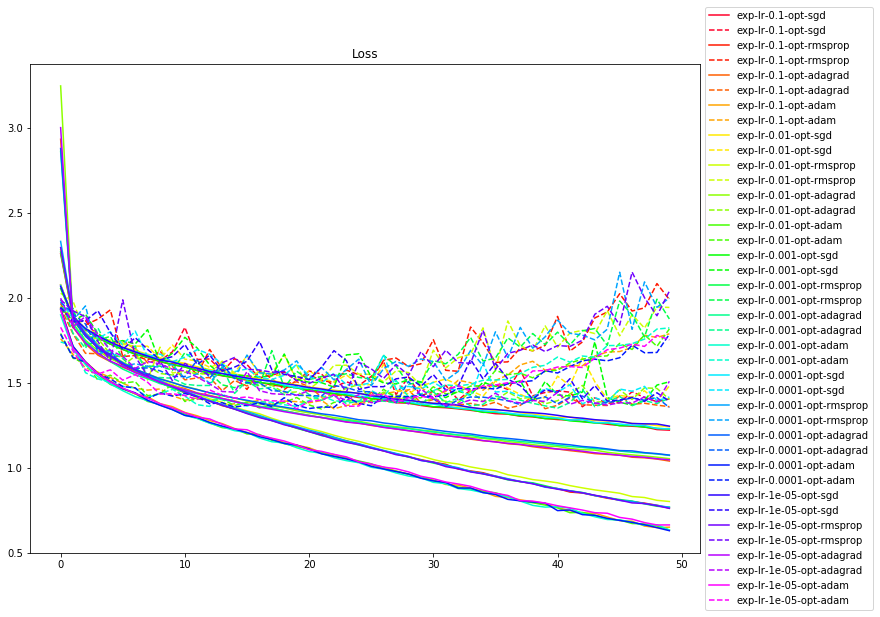

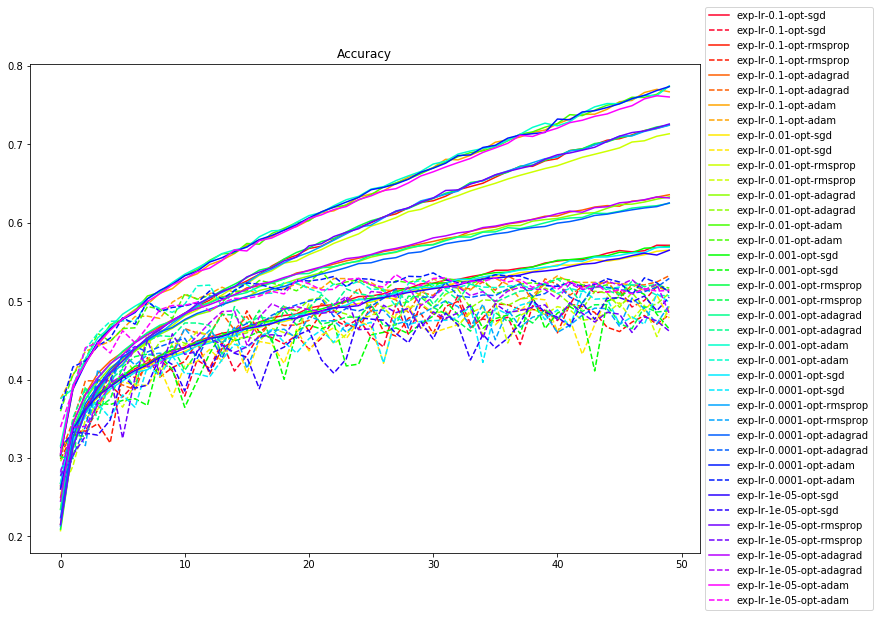

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()